In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import re
import fasttext
import numpy as np
from konlpy.tag import Okt
import pathlib
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
train_df = pd.read_csv('data/train_truncated.csv')
train_df.head()

,ko,en,source
0,지방세법 개정안에 따른 종합부동산세는 부과징수권자의 경우를 제외하고는 대부분 종전 ...,Comprehensive real estate tax according to the...,125
1,실신 당시 5초 정도 의식소실이 있었고 바로 의식은 회복되으며 신경학적 이상증상은 ...,"At the time of fainting, there was a loss of c...",124
2,문 대통령의 10월 방일이 성사될 경우 한·일 양국은 일본군 위안부 합의 이행 문제...,"If President Moon visits Japan in October, the...",126
3,인덱스 펀드에 대한 투자에서는 장기적인 관점에서 수익을 얻을 수 있습니다.,Investment in index funds provides profitabili...,71265
4,돌봐야 하는 비용도 있지.,I also have expenses to take care of.,71265


In [4]:
# Dataset size
dataset_size = len(train_df)
print(f"Dataset size: {dataset_size}")

Dataset size: 10000


# Preprocessing
*data description and cleaning*

In [8]:
def clean_and_tokenize_ko(text):
    okt = Okt() # initialize tokenizer
    text = re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", text) # remove special characters
    return okt.morphs(text) # tokenize

def clean_and_tokenize_en(text):
    text = re.sub(r'[^a-zA-Z]+', " ", text) # remove special characters
    return text.split() # tokenize

In [9]:
#train_df['ko_detailed_tokenized'] = train_df['ko'].apply(clean_and_tokenize_ko)
#train_df['en_detailed_tokenized'] = train_df['en'].apply(clean_and_tokenize_en)

In [5]:
# Load the preprocessed data
train_df = pd.read_csv('data/train_preprocessed.csv')

In [6]:
train_df.head()

,ko,en,source,ko_detailed_tokenized,en_detailed_tokenized
0,지방세법 개정안에 따른 종합부동산세는 부과징수권자의 경우를 제외하고는 대부분 종전 ...,Comprehensive real estate tax according to the...,125,"['지방', '세법', '개정안', '에', '따른', '종합', '부동산', '세...","['Comprehensive', 'real', 'estate', 'tax', 'ac..."
1,실신 당시 5초 정도 의식소실이 있었고 바로 의식은 회복되으며 신경학적 이상증상은 ...,"At the time of fainting, there was a loss of c...",124,"['실신', '당시', '초', '정도', '의식', '소실', '이', '있었고'...","['At', 'the', 'time', 'of', 'fainting', 'there..."
2,문 대통령의 10월 방일이 성사될 경우 한·일 양국은 일본군 위안부 합의 이행 문제...,"If President Moon visits Japan in October, the...",126,"['문', '대통령', '의', '월', '방일', '이', '성사', '될', '...","['If', 'President', 'Moon', 'visits', 'Japan',..."
3,인덱스 펀드에 대한 투자에서는 장기적인 관점에서 수익을 얻을 수 있습니다.,Investment in index funds provides profitabili...,71265,"['인덱스', '펀드', '에', '대한', '투자', '에서는', '장기', '적...","['Investment', 'in', 'index', 'funds', 'provid..."
4,돌봐야 하는 비용도 있지.,I also have expenses to take care of.,71265,"['돌봐야', '하는', '비용', '도', '있지']","['I', 'also', 'have', 'expenses', 'to', 'take'..."


In [7]:
train_df[['ko_detailed_tokenized', 'en_detailed_tokenized']].head()

,ko_detailed_tokenized,en_detailed_tokenized
0,"['지방', '세법', '개정안', '에', '따른', '종합', '부동산', '세...","['Comprehensive', 'real', 'estate', 'tax', 'ac..."
1,"['실신', '당시', '초', '정도', '의식', '소실', '이', '있었고'...","['At', 'the', 'time', 'of', 'fainting', 'there..."
2,"['문', '대통령', '의', '월', '방일', '이', '성사', '될', '...","['If', 'President', 'Moon', 'visits', 'Japan',..."
3,"['인덱스', '펀드', '에', '대한', '투자', '에서는', '장기', '적...","['Investment', 'in', 'index', 'funds', 'provid..."
4,"['돌봐야', '하는', '비용', '도', '있지']","['I', 'also', 'have', 'expenses', 'to', 'take'..."


In [8]:
# Sentence length distribution
ko_lengths = train_df['ko_detailed_tokenized'].apply(len)
en_lengths = train_df['en_detailed_tokenized'].apply(len)

In [9]:
# Common words
ko_common_words = Counter([word for sublist in train_df['ko_detailed_tokenized'] for word in sublist]).most_common(10)
en_common_words = Counter([word for sublist in train_df['en_detailed_tokenized'] for word in sublist]).most_common(10)

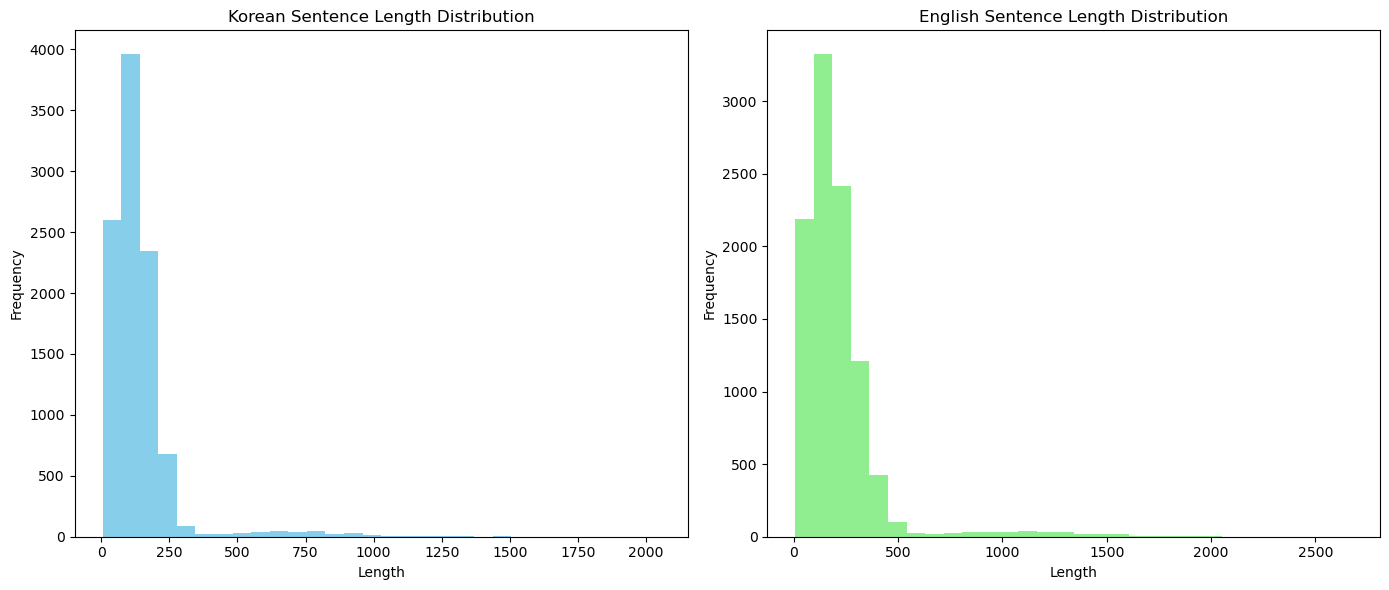

In [10]:
# Plotting sentence length distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(ko_lengths, bins=30, color='skyblue', label='Korean')
plt.title('Korean Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(en_lengths, bins=30, color='lightgreen', label='English')
plt.title('English Sentence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [11]:
# Some data statistics

print(f"Korean: {ko_common_words}")
print(f"English: {en_common_words}")

(dataset_size, ko_common_words, en_common_words)




Korean: [("'", 469072), (',', 224536), (' ', 224536), ('이', 13095), ('다', 11837), ('는', 10230), ('[', 10000), (']', 10000), ('에', 9432), ('의', 9197)]
English: [("'", 475488), (',', 227744), (' ', 227744), ('e', 142428), ('t', 105103), ('a', 93793), ('i', 89113), ('o', 87436), ('n', 86245), ('r', 72477)]


(10000,
 [("'", 469072),
  (',', 224536),
  (' ', 224536),
  ('이', 13095),
  ('다', 11837),
  ('는', 10230),
  ('[', 10000),
  (']', 10000),
  ('에', 9432),
  ('의', 9197)],
 [("'", 475488),
  (',', 227744),
  (' ', 227744),
  ('e', 142428),
  ('t', 105103),
  ('a', 93793),
  ('i', 89113),
  ('o', 87436),
  ('n', 86245),
  ('r', 72477)])

In [12]:
# number of unique words in the dataset
ko_unique_words = len(set([word for sublist in train_df['ko_detailed_tokenized'] for word in sublist]))
en_unique_words = len(set([word for sublist in train_df['en_detailed_tokenized'] for word in sublist]))

print(f"Number of unique words in Korean: {ko_unique_words}")
print(f"Number of unique words in English: {en_unique_words}")

Number of unique words in Korean: 1364
Number of unique words in English: 57


In [13]:

ko_max_length = max(train_df['ko_detailed_tokenized'].apply(len))
en_max_length = max(train_df['en_detailed_tokenized'].apply(len))

print(f"Maximum length of Korean sentence: {ko_max_length}")
print(f"Maximum length of English sentence: {en_max_length}")


Maximum length of Korean sentence: 2050
Maximum length of English sentence: 2676


In [ ]:
# Average sentence length 
ko_avg_length = np.mean(ko_lengths)
en_avg_length = np.mean(en_lengths)

# average word length
ko_avg_word_length = np.mean([len(word) for sublist in train_df['ko_detailed_tokenized'] for word in sublist])
en_avg_word_length = np.mean([len(word) for sublist in train_df['en_detailed_tokenized'] for word in sublist])

print(f"Average length of Korean sentence: {ko_avg_length}")
print(f"Average length of English sentence: {en_avg_length}")
print(f"Average word length of Korean: {ko_avg_word_length}")
print(f"Average word length of English: {en_avg_word_length}")

# variance of sentence length
ko_var_length = np.var(ko_lengths)
en_var_length = np.var(en_lengths)



In [ ]:
# plot word length distribution
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist([len(word) for sublist in train_df['ko_detailed_tokenized'] for word in sublist], bins=30, color='skyblue', label='Korean')
plt.title('Korean Word Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist([len(word) for sublist in train_df['en_detailed_tokenized'] for word in sublist], bins=30, color='lightgreen', label='English')
plt.title('English Word Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# plot box plot of sentence length
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.boxplot(ko_lengths, vert=False)
plt.title('Korean Sentence Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 2, 2)
plt.boxplot(en_lengths, vert=False)
plt.title('English Sentence Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

In [14]:

# Save the preprocessed data
train_df.to_csv('data/train_preprocessed.csv', index=False)


Common Words:

In Korean, common words include "수" (can), "있다" (exist/have), and "및" (and), among others. These are functional words that are likely to appear frequently in a variety of contexts.
In English, the most common words are functional words like "the", "of", "a", and "and", which is expected in a corpus with diverse content

The sentence length distribution suggests a range we might consider for padding. We'd likely choose a padding length that accommodates the majority of sentences without excessively padding shorter ones.

The common words analysis indicates a significant presence of functional words, which are essential for understanding sentence structure. However, for both languages, it might be beneficial to limit the vocabulary size to exclude very rare words, which could help in reducing the model complexity and potentially improving performance.

In [15]:
# Parameters based on data analysis
max_seq_length = 50  # Example value, adjust based on analysis
vocab_size = 10000  # Example value, adjust based on frequency analysis

# Limiting vocabulary size and applying padding
# For simplicity, this example demonstrates the approach without directly applying it

# Function to build a vocabulary and limit it to the most common words
def build_vocab(tokenized_texts, max_vocab_size):
    # Count word frequencies
    word_freq = Counter([word for sublist in tokenized_texts for word in sublist])
    # Most common words
    most_common_words = word_freq.most_common(max_vocab_size)
    # Build vocabulary {word: index}
    vocab = {word: index + 1 for index, (word, _) in enumerate(most_common_words)}  # +1 for leaving 0 for padding
    vocab['<UNK>'] = len(vocab) + 1  # Unknown token
    return vocab

# Build vocabularies for both languages
ko_vocab = build_vocab(train_df['ko_detailed_tokenized'], vocab_size)
en_vocab = build_vocab(train_df['en_detailed_tokenized'], vocab_size)

(ko_vocab, en_vocab)

({"'": 1,
  ',': 2,
  ' ': 3,
  '이': 4,
  '다': 5,
  '는': 6,
  '[': 7,
  ']': 8,
  '에': 9,
  '의': 10,
  '하': 11,
  '을': 12,
  '가': 13,
  '로': 14,
  '한': 15,
  '기': 16,
  '지': 17,
  '고': 18,
  '수': 19,
  '를': 20,
  '서': 21,
  '있': 22,
  '은': 23,
  '제': 24,
  '사': 25,
  '도': 26,
  '시': 27,
  '상': 28,
  '정': 29,
  '인': 30,
  '해': 31,
  '으': 32,
  '어': 33,
  '자': 34,
  '부': 35,
  '대': 36,
  '리': 37,
  '성': 38,
  '과': 39,
  '적': 40,
  '전': 41,
  '니': 42,
  '스': 43,
  '장': 44,
  '구': 45,
  '보': 46,
  '나': 47,
  '용': 48,
  '요': 49,
  '들': 50,
  '되': 51,
  '일': 52,
  '위': 53,
  '여': 54,
  '주': 55,
  '아': 56,
  '것': 57,
  '공': 58,
  '치': 59,
  '할': 60,
  '된': 61,
  '라': 62,
  '면': 63,
  '그': 64,
  '게': 65,
  '관': 66,
  '조': 67,
  '원': 68,
  '소': 69,
  '동': 70,
  '화': 71,
  '경': 72,
  '유': 73,
  '와': 74,
  '국': 75,
  '비': 76,
  '계': 77,
  '중': 78,
  '신': 79,
  '연': 80,
  '터': 81,
  '내': 82,
  '방': 83,
  '트': 84,
  '우': 85,
  '단': 86,
  '체': 87,
  '만': 88,
  '문': 89,
  '분': 90,
  '개': 91,
  '발': 9

In [16]:
# Function to convert tokenized texts to sequences of indices, with padding and truncation
def texts_to_sequences(tokenized_texts, vocab, max_length):
    sequences = []
    for tokens in tokenized_texts:
        # Convert tokens to indices, replace unknown words with <UNK> index
        sequence = [vocab.get(word, vocab['<UNK>']) for word in tokens[:max_length]]
        # Padding
        sequence += [0] * (max_length - len(sequence))  # Add padding if necessary
        sequences.append(sequence)
    return sequences

# Convert tokenized texts to sequences
ko_sequences = texts_to_sequences(train_df['ko_detailed_tokenized'], ko_vocab, max_seq_length)
en_sequences = texts_to_sequences(train_df['en_detailed_tokenized'], en_vocab, max_seq_length)

# Example output of the first processed sequence for each language
(ko_sequences[0][:10], en_sequences[0][:10])  # Displaying first 10 tokens for brevity


([7, 1, 17, 83, 1, 2, 3, 1, 93, 125], [25, 1, 33, 8, 17, 18, 10, 4, 12, 4])

In [17]:
ko_embeddings_path = 'data/cc.ko.300.bin'
en_embeddings_path = 'data/cc.en.300.bin'

In [ ]:
ko_model = fasttext.load_model(ko_embeddings_path)
en_model = fasttext.load_model(en_embeddings_path)

: 

In [ ]:
def texts_to_embeddings(tokenized_texts, embedding_model, max_length, embedding_size=300):
    # Initialize an array for the embeddings
    embedding_matrix = np.zeros((len(tokenized_texts), max_length, embedding_size))

    for i, tokens in enumerate(tokenized_texts):
        for j, token in enumerate(tokens[:max_length]):  # Ensure not to exceed max_length
            embedding = embedding_model.get_word_vector(token)
            embedding_matrix[i, j, :] = embedding

    return embedding_matrix

In [ ]:
# Convert tokenized texts to embeddings
ko_embedding_matrix = texts_to_embeddings(train_df['ko_detailed_tokenized'], ko_model, max_seq_length)
en_embedding_matrix = texts_to_embeddings(train_df['en_detailed_tokenized'], en_model, max_seq_length)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding

# Define model architecture
model = Sequential()
model.add(LSTM(128, input_shape=(max_seq_length, 300), return_sequences=True))
model.add(Dense(300, activation='relu'))
model.compile(optimizer='adam', loss='mse')  # Mean Squared Error for simplicity



In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define checkpoint to save the best model in the 'data' folder
checkpoint = ModelCheckpoint('/content/drive/MyDrive/data/best_model_10.h5', monitor='loss', verbose=1, save_best_only=True, mode='min')

# Define early stopping to halt training after 5 epochs without improvement
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1, mode='min')

# Add callbacks to training
history = model.fit(ko_embedding_matrix, en_embedding_matrix, epochs=10, batch_size=4, callbacks=[checkpoint, early_stopping])


Epoch 1/30
20822/20833 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 1: loss improved from inf to 0.00436, saving model to /content/drive/MyDrive/data/best_model_30.h5
20833/20833 [==============================] - 89s 4ms/step - loss: 0.0044
Epoch 2/30
20829/20833 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 2: loss improved from 0.00436 to 0.00436, saving model to /content/drive/MyDrive/data/best_model_30.h5
20833/20833 [==============================] - 89s 4ms/step - loss: 0.0044
Epoch 3/30
20831/20833 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 3: loss improved from 0.00436 to 0.00435, saving model to /content/drive/MyDrive/data/best_model_30.h5
20833/20833 [==============================] - 89s 4ms/step - loss: 0.0044
Epoch 4/30
20826/20833 [============================>.] - ETA: 0s - loss: 0.0044
Epoch 4: loss improved from 0.00435 to 0.00435, saving model to /content/drive/MyDrive/data/best_model_30.h5
20833/20833 [======

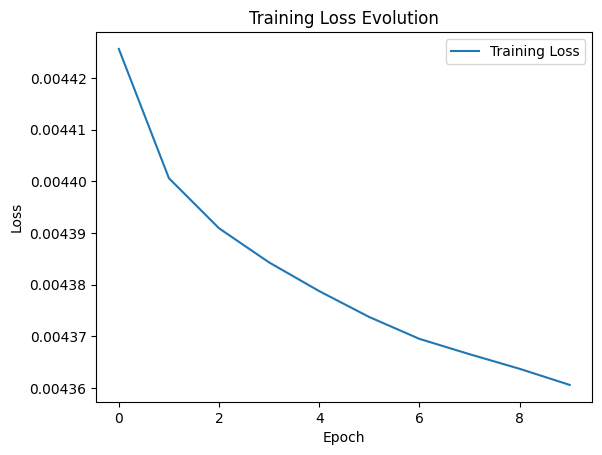

In [ ]:
import matplotlib.pyplot as plt

# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Evolution')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/data/test.csv')
test_df.head()

,ko,en,source
0,「견우직녀」 그림책은 가장 흔하면서도 뿌리 깊은 우리의 정서와 관련된 별에 얽힌 이...,"The picture book ""Gyeonwoo and Jiknyeo"" depict...",125
1,여러 호텔 객실 가격을 찾아봤는데요.,I looked over the price of various hotel rooms.,71265
2,모바일 관광 애플리케이션에서 서비스 요구 사항의 분류 및 평가는 매우 중요하다.,Classification and evaluation of service requi...,124
3,Congressional Avenue에서 내려주실 수 있나요?,Can you drop us off at Congressional Avenue?,71265
4,>80 뽑았어?,">Did you pick 800,000?",71265


In [ ]:
test_df['ko_detailed_tokenized'] = test_df['ko'].apply(clean_and_tokenize_ko)
ko_test_sequences = texts_to_sequences(test_df['ko_detailed_tokenized'], ko_vocab, max_seq_length)

In [ ]:
ko_test_embedding_matrix = texts_to_embeddings(test_df['ko_detailed_tokenized'], ko_model, max_seq_length)


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/data/best_model_30.h5')
predicted_en_embedding_matrix = model.predict(ko_test_embedding_matrix)


326/326 [==============================] - 9s 25ms/step


In [ ]:
def create_word_embedding_mapping(vocab, embedding_model):
    words = list(vocab.keys())
    embeddings = np.array([embedding_model.get_word_vector(word) for word in words])
    return words, embeddings

In [ ]:
from sklearn.neighbors import NearestNeighbors
# Additional steps for converting embeddings back to English text
en_words, en_word_embeddings = create_word_embedding_mapping(en_vocab, en_model)

def find_nearest_words(predicted_embeddings, words, word_embeddings):
    nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(word_embeddings)
    nearest_words = []
    for embedding in predicted_embeddings:
        distances, indices = nbrs.kneighbors([embedding])
        nearest_word = words[indices[0][0]]
        nearest_words.append(nearest_word)
    return nearest_words

predicted_texts = []
for predicted_embedding in predicted_en_embedding_matrix.reshape(-1, max_seq_length, 300):
    nearest_words = find_nearest_words(predicted_embedding, en_words, en_word_embeddings)
    predicted_text = ' '.join(nearest_words)
    predicted_texts.append(predicted_text)

In [ ]:
predicted_texts

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

# Prepare the reference translations: they should be tokenized and wrapped in a list
references = [[text.split()] for text in test_df['en']]

# Prepare the candidate (predicted) translations: also tokenized
candidates = [text.split() for text in predicted_texts]

# Calculate the BLEU score
bleu_score = corpus_bleu(references, candidates)

print(f"BLEU Score: {bleu_score}")


BLEU Score: 1.5513130996472257e-156


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
